# 서울시 부동산 실거래가 이용하여 2년뒤 예측
### 2015 ~ 2020년 자치구별로 평균을 내어 정리한 후 그래프로 비교하고 시계열조사를 통하여 21~22년 어떻게 부동산 가격이 변화할지에 대해 알아 보았습니다.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import seaborn as sns  
%matplotlib inline 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
df2 = pd.read_csv("서울특별시 부동산 실거래가 정보.csv" , encoding = 'cp949')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df2

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건물명,건축년도
0,11440-2020-4-0007027-1,1144010800,11440,마포구,1144010800,대흥동,2020,4,신고,1,56.0,19.83,0,NaN,1001,단독주택,680000000,NaN,1964.0
1,11110-2020-4-0001450-1,1111017100100040000,11110,종로구,1111017100,명륜2가,2020,4,신고,1,0.0,84.90,0,12.0,2001,아파트,890000000,아남1,1995.0
2,11350-2020-4-0007054-1,1135010200105560000,11350,노원구,1135010200,월계동,2020,4,신고,1,0.0,44.52,0,8.0,2001,아파트,320000000,주공2,1992.0
3,11110-2020-4-0004943-1,1111016700,11110,종로구,1111016700,충신동,2020,4,신고,1,67.1,44.39,0,NaN,1001,단독주택,220000000,NaN,1978.0
4,11305-2020-4-0005674-1,1130510200,11305,강북구,1130510200,번동,2020,4,신고,1,88.6,45.59,0,NaN,1001,단독주택,287000000,NaN,1973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247257,11500-2006-4-0031872-1,1150010400104480001,11500,강서구,1150010400,가양동,2006,4,신고,1,NaN,59.76,0,9.0,2001,아파트,348000000,가양강나루현대,1999.0
2247258,11500-2006-4-0031874-1,1150010200107010000,11500,강서구,1150010200,등촌동,2006,4,신고,1,NaN,84.96,0,1.0,2001,아파트,420000000,진로미주아파트,1994.0
2247259,11500-2006-4-0031875-1,1150010800,11500,강서구,1150010800,공항동,2006,4,신고,1,139.0,240.64,0,NaN,1001,단독주택,410000000,NaN,1994.0
2247260,11320-2005-4-0009356-1,1132010600107130000,11320,도봉구,1132010600,방학동,2005,4,신고,1,0.0,84.90,0,17.0,2001,아파트,171000000,브라운스톤방학아파트,2003.0


In [4]:
df2.dtypes

실거래가아이디     object
지번코드        object
시군구코드        int64
자치구명        object
법정동코드        int64
법정동명        object
신고년도         int64
업무구분코드       int64
업무구분        object
물건번호         int64
대지권면적      float64
건물면적       float64
관리구분코드      object
층정보        float64
건물주용도코드      int64
건물주용도       object
물건금액         int64
건물명         object
건축년도       float64
dtype: object

In [5]:
table = df2[df2['신고년도'] >= 2015]
table['신고년도'] = table['신고년도'].astype(str)
table

<ipython-input-5-de4aaf79d375>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['신고년도'] = table['신고년도'].astype(str)


,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건물명,건축년도
0,11440-2020-4-0007027-1,1144010800,11440,마포구,1144010800,대흥동,2020,4,신고,1,56.00,19.83,0,NaN,1001,단독주택,680000000,NaN,1964.0
1,11110-2020-4-0001450-1,1111017100100040000,11110,종로구,1111017100,명륜2가,2020,4,신고,1,0.00,84.90,0,12.0,2001,아파트,890000000,아남1,1995.0
2,11350-2020-4-0007054-1,1135010200105560000,11350,노원구,1135010200,월계동,2020,4,신고,1,0.00,44.52,0,8.0,2001,아파트,320000000,주공2,1992.0
3,11110-2020-4-0004943-1,1111016700,11110,종로구,1111016700,충신동,2020,4,신고,1,67.10,44.39,0,NaN,1001,단독주택,220000000,NaN,1978.0
4,11305-2020-4-0005674-1,1130510200,11305,강북구,1130510200,번동,2020,4,신고,1,88.60,45.59,0,NaN,1001,단독주택,287000000,NaN,1973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067346,11680-2015-4-0021113-1,1168010300101410000,11680,강남구,1168010300,개포동,2015,4,신고,1,NaN,50.38,0,3.0,2001,아파트,940000000,개포주공 1단지,1982.0
1067347,11680-2015-4-0021112-1,1168011800105270000,11680,강남구,1168011800,도곡동,2015,4,신고,1,NaN,114.99,0,9.0,2001,아파트,1590000000,도곡렉슬,2006.0
1067348,11680-2015-4-0021110-1,1168010300101410000,11680,강남구,1168010300,개포동,2015,4,신고,1,NaN,35.87,0,5.0,2001,아파트,685000000,개포주공 1단지,1982.0
1067349,11680-2015-4-0021108-1,1168010600109130006,11680,강남구,1168010600,대치동,2015,4,신고,1,37.46,60.83,0,2.0,2002,연립주택,420000000,한림빌리지,1994.0


In [6]:
pi_table = pd.pivot_table(table, values='물건금액', index = ['자치구명'],
                       columns = ['신고년도'], aggfunc=np.mean)
pi_table

신고년도,2015,2016,2017,2018,2019,2020
자치구명,,,,,,
강남구,8.247352e+08,9.179511e+08,1.072790e+09,1.199672e+09,1.443857e+09,1.366343e+09
강동구,4.262044e+08,4.599410e+08,5.229899e+08,5.524876e+08,6.281904e+08,6.222250e+08
강북구,2.707382e+08,2.880266e+08,3.073916e+08,3.339010e+08,3.309038e+08,3.641222e+08
강서구,3.004286e+08,3.406767e+08,3.549379e+08,3.935015e+08,3.891968e+08,4.555182e+08
관악구,3.313313e+08,3.539386e+08,3.913477e+08,4.480769e+08,4.508922e+08,4.915014e+08
광진구,4.705267e+08,4.860657e+08,5.168810e+08,6.047573e+08,6.029154e+08,6.539282e+08
구로구,2.934265e+08,3.146002e+08,3.346886e+08,3.699948e+08,3.984697e+08,4.266327e+08
금천구,2.870435e+08,3.246803e+08,3.290451e+08,3.539665e+08,3.441223e+08,3.670310e+08
노원구,2.785011e+08,3.028048e+08,3.270961e+08,3.707119e+08,4.080847e+08,4.719568e+08


In [7]:
div_table = pi_table/100000000 #단위 : 억원
div_table

신고년도,2015,2016,2017,2018,2019,2020
자치구명,,,,,,
강남구,8.247352,9.179511,10.727897,11.996723,14.438571,13.663426
강동구,4.262044,4.599410,5.229899,5.524876,6.281904,6.222250
강북구,2.707382,2.880266,3.073916,3.339010,3.309038,3.641222
강서구,3.004286,3.406767,3.549379,3.935015,3.891968,4.555182
관악구,3.313313,3.539386,3.913477,4.480769,4.508922,4.915014
광진구,4.705267,4.860657,5.168810,6.047573,6.029154,6.539282
구로구,2.934265,3.146002,3.346886,3.699948,3.984697,4.266327
금천구,2.870435,3.246803,3.290451,3.539665,3.441223,3.670310
노원구,2.785011,3.028048,3.270961,3.707119,4.080847,4.719568


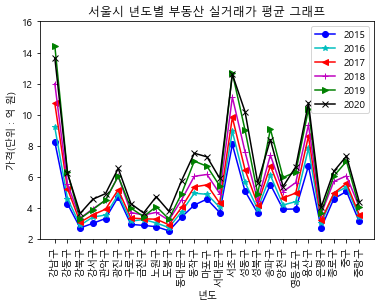

In [8]:
x = div_table.index
y1 = div_table['2015']
y2 = div_table['2016']
y3 = div_table['2017']
y4 = div_table['2018']
y5 = div_table['2019']
y6 = div_table['2020']

plt.plot(x,y1, label = '2015', marker = "o", color = 'b')
plt.plot(x,y2, label = '2016', marker = "*", color = 'c')
plt.plot(x,y3, label = '2017', marker = '<', color = 'r')
plt.plot(x,y4, label = '2018', marker = '+', color = 'm')
plt.plot(x,y5, label = '2019', marker = '>', color = 'g')
plt.plot(x,y6, label = '2020', marker = 'x', color = 'k')
plt.legend()
plt.xlabel('년도')
plt.ylabel('가격(단위 : 억 원)')
plt.title('서울시 년도별 부동산 실거래가 평균 그래프')
plt.xticks(rotation = 90)
plt.ylim(2, 16)
plt.show()

In [9]:
t = np.arange(2015,2021)
money = pd.pivot_table(table, values='물건금액', index = ['신고년도'],
                       columns = ['자치구명'], aggfunc=np.mean)
money = round((money / 100000000),2) #단위 : 억원
money

자치구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고년도,,,,,,,,,,,,,,,,,,,,,
2015,8.25,4.26,2.71,3.00,3.31,4.71,2.93,2.87,2.79,2.52,...,5.07,3.66,5.50,3.91,3.92,6.70,2.70,4.59,5.06,3.13
2016,9.18,4.60,2.88,3.41,3.54,4.86,3.15,3.25,3.03,2.73,...,5.64,3.92,6.10,4.18,4.40,7.83,3.00,4.91,5.35,3.42
2017,10.73,5.23,3.07,3.55,3.91,5.17,3.35,3.29,3.27,2.91,...,6.45,4.21,6.71,4.64,4.96,8.61,3.19,4.94,5.59,3.57
2018,12.00,5.52,3.34,3.94,4.48,6.05,3.70,3.54,3.71,3.20,...,7.62,4.46,7.39,5.04,5.63,9.35,3.61,5.70,6.06,4.05
2019,14.44,6.28,3.31,3.89,4.51,6.03,3.98,3.44,4.08,3.28,...,9.01,4.90,9.07,5.96,6.31,10.36,3.70,6.04,7.00,4.08
2020,13.66,6.22,3.64,4.56,4.92,6.54,4.27,3.67,4.72,3.78,...,10.20,5.61,8.40,5.37,6.64,10.75,4.04,6.35,7.33,4.41


In [10]:
Predict = pd.DataFrame(index = [2021, 2022])
y_pred_df = pd.DataFrame()
error_df = pd.DataFrame()
abs_error_df = pd.DataFrame()
pct_error_df = pd.DataFrame()
sq_error_df = pd.DataFrame()
merror_df = pd.DataFrame(columns = ['me', 'mae', 'mape', 'mse'], index = money.columns)

In [11]:
for i in range(0,len(money.columns)):
    y = money.iloc[:,i]
    x = t
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print(model.summary())
    test_data = [2021, 2022]
    Predict[money.columns[i]] = model.predict(sm.add_constant(test_data))
    y_pred = model.predict(x)
    error = y - y_pred
    abs_error = np.abs(error)
    pct_error = (abs_error / y) * 100
    sq_error = error**2
    me = round(error.mean(),2)
    mae = round(abs_error.mean(),2)
    mape = round(pct_error.mean(),2)
    mse = round(sq_error.mean(),2)
    y_pred_df[money.columns[i]] = (y_pred)
    error_df[money.columns[i]] = (error)
    abs_error_df[money.columns[i]] = (abs_error)
    pct_error_df[money.columns[i]] = (pct_error)
    sq_error_df[money.columns[i]] = (sq_error)
    merror_df.iloc[i,:] = [me, mae, mape, mse]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib

                            OLS Regression Results                            
Dep. Variable:                    강남구   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     50.00
Date:                Sun, 13 Dec 2020   Prob (F-statistic):            0.00211
Time:                        16:35:07   Log-Likelihood:                -5.5346
No. Observations:                   6   AIC:                             15.07
Df Residuals:                       4   BIC:                             14.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2530.6733    359.508     -7.039      0.0

                            OLS Regression Results                            
Dep. Variable:                   영등포구   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     575.5
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.79e-05
Time:                        16:35:07   Log-Likelihood:                 6.5398
No. Observations:                   6   AIC:                            -9.080
Df Residuals:                       4   BIC:                            -9.496
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1147.5471     48.055    -23.880      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib

In [12]:
Predict_merge = pd.concat([money,Predict])
Predict_merge

자치구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
2015,8.250000,4.260000,2.710000,3.000000,3.310000,4.710000,2.930000,2.870000,2.790000,2.520000,...,5.070000,3.660000,5.500000,3.910000,3.920000,6.700000,2.700000,4.590000,5.060000,3.130000
2016,9.180000,4.600000,2.880000,3.410000,3.540000,4.860000,3.150000,3.250000,3.030000,2.730000,...,5.640000,3.920000,6.100000,4.180000,4.400000,7.830000,3.000000,4.910000,5.350000,3.420000
2017,10.730000,5.230000,3.070000,3.550000,3.910000,5.170000,3.350000,3.290000,3.270000,2.910000,...,6.450000,4.210000,6.710000,4.640000,4.960000,8.610000,3.190000,4.940000,5.590000,3.570000
2018,12.000000,5.520000,3.340000,3.940000,4.480000,6.050000,3.700000,3.540000,3.710000,3.200000,...,7.620000,4.460000,7.390000,5.040000,5.630000,9.350000,3.610000,5.700000,6.060000,4.050000
2019,14.440000,6.280000,3.310000,3.890000,4.510000,6.030000,3.980000,3.440000,4.080000,3.280000,...,9.010000,4.900000,9.070000,5.960000,6.310000,10.360000,3.700000,6.040000,7.000000,4.080000
2020,13.660000,6.220000,3.640000,4.560000,4.920000,6.540000,4.270000,3.670000,4.720000,3.780000,...,10.200000,5.610000,8.400000,5.370000,6.640000,10.750000,4.040000,6.350000,7.330000,4.410000
2021,15.786667,6.864667,3.779333,4.688000,5.264667,6.914000,4.517333,3.825333,4.924000,3.894000,...,11.024667,5.754000,9.604000,6.154000,7.310000,11.791333,4.295333,6.716667,7.742000,4.662667
2022,17.046667,7.296952,3.956762,4.963143,5.594095,7.300857,4.789905,3.963048,5.302286,4.129429,...,12.079810,6.123714,10.292286,6.526571,7.881429,12.607905,4.558762,7.086667,8.221143,4.915810


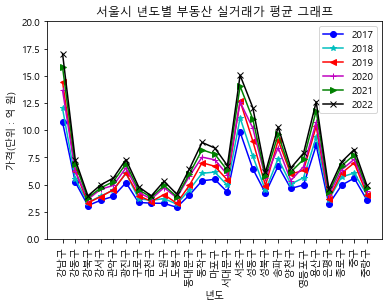

In [38]:
x = Predict_merge.columns
y1 = Predict_merge.iloc[2,:]
y2 = Predict_merge.iloc[3,:]
y3 = Predict_merge.iloc[4,:]
y4 = Predict_merge.iloc[5,:]
y5 = Predict_merge.iloc[6,:]
y6 = Predict_merge.iloc[7,:]

plt.plot(x,y1, label = '2017', marker = "o", color = 'b')
plt.plot(x,y2, label = '2018', marker = "*", color = 'c')
plt.plot(x,y3, label = '2019', marker = '<', color = 'r')
plt.plot(x,y4, label = '2020', marker = '+', color = 'm')
plt.plot(x,y5, label = '2021', marker = '>', color = 'g')
plt.plot(x,y6, label = '2022', marker = 'x', color = 'k')
plt.legend()
plt.xlabel('년도')
plt.ylabel('가격(단위 : 억 원)')
plt.title('서울시 년도별 부동산 실거래가 평균 그래프')
plt.xticks(rotation = 90)
plt.ylim(0, 20)
plt.show()

In [13]:
y_pred_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,8.226667,4.270952,2.714762,3.037143,3.288095,4.592857,2.881905,2.999048,2.654286,2.481429,...,4.693810,3.535714,5.474286,3.918571,3.881429,6.891905,2.714762,4.496667,4.867143,3.143810
1,9.486667,4.703238,2.892190,3.312286,3.617524,4.979714,3.154476,3.136762,3.032571,2.716857,...,5.748952,3.905429,6.162571,4.291143,4.452857,7.708476,2.978190,4.866667,5.346286,3.396952
2,10.746667,5.135524,3.069619,3.587429,3.946952,5.366571,3.427048,3.274476,3.410857,2.952286,...,6.804095,4.275143,6.850857,4.663714,5.024286,8.525048,3.241619,5.236667,5.825429,3.650095
3,12.006667,5.567810,3.247048,3.862571,4.276381,5.753429,3.699619,3.412190,3.789143,3.187714,...,7.859238,4.644857,7.539143,5.036286,5.595714,9.341619,3.505048,5.606667,6.304571,3.903238
4,13.266667,6.000095,3.424476,4.137714,4.605810,6.140286,3.972190,3.549905,4.167429,3.423143,...,8.914381,5.014571,8.227429,5.408857,6.167143,10.158190,3.768476,5.976667,6.783714,4.156381
5,14.526667,6.432381,3.601905,4.412857,4.935238,6.527143,4.244762,3.687619,4.545714,3.658571,...,9.969524,5.384286,8.915714,5.781429,6.738571,10.974762,4.031905,6.346667,7.262857,4.409524


In [14]:
error_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고년도,,,,,,,,,,,,,,,,,,,,,
2015,0.023333,-0.010952,-0.004762,-0.037143,0.021905,0.117143,0.048095,-0.129048,0.135714,0.038571,...,0.376190,0.124286,0.025714,-0.008571,0.038571,-0.191905,-0.014762,0.093333,0.192857,-0.013810
2016,-0.306667,-0.103238,-0.012190,0.097714,-0.077524,-0.119714,-0.004476,0.113238,-0.002571,0.013143,...,-0.108952,0.014571,-0.062571,-0.111143,-0.052857,0.121524,0.021810,0.043333,0.003714,0.023048
2017,-0.016667,0.094476,0.000381,-0.037429,-0.036952,-0.196571,-0.077048,0.015524,-0.140857,-0.042286,...,-0.354095,-0.065143,-0.140857,-0.023714,-0.064286,0.084952,-0.051619,-0.296667,-0.235429,-0.080095
2018,-0.006667,-0.047810,0.092952,0.077429,0.203619,0.296571,0.000381,0.127810,-0.079143,0.012286,...,-0.239238,-0.184857,-0.149143,0.003714,0.034286,0.008381,0.104952,0.093333,-0.244571,0.146762
2019,1.173333,0.279905,-0.114476,-0.247714,-0.095810,-0.110286,0.007810,-0.109905,-0.087429,-0.143143,...,0.095619,-0.114571,0.842571,0.551143,0.142857,0.201810,-0.068476,0.063333,0.216286,-0.076381
2020,-0.866667,-0.212381,0.038095,0.147143,-0.015238,0.012857,0.025238,-0.017619,0.174286,0.121429,...,0.230476,0.225714,-0.515714,-0.411429,-0.098571,-0.224762,0.008095,0.003333,0.067143,0.000476


In [15]:
abs_error_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고년도,,,,,,,,,,,,,,,,,,,,,
2015,0.023333,0.010952,0.004762,0.037143,0.021905,0.117143,0.048095,0.129048,0.135714,0.038571,...,0.376190,0.124286,0.025714,0.008571,0.038571,0.191905,0.014762,0.093333,0.192857,0.013810
2016,0.306667,0.103238,0.012190,0.097714,0.077524,0.119714,0.004476,0.113238,0.002571,0.013143,...,0.108952,0.014571,0.062571,0.111143,0.052857,0.121524,0.021810,0.043333,0.003714,0.023048
2017,0.016667,0.094476,0.000381,0.037429,0.036952,0.196571,0.077048,0.015524,0.140857,0.042286,...,0.354095,0.065143,0.140857,0.023714,0.064286,0.084952,0.051619,0.296667,0.235429,0.080095
2018,0.006667,0.047810,0.092952,0.077429,0.203619,0.296571,0.000381,0.127810,0.079143,0.012286,...,0.239238,0.184857,0.149143,0.003714,0.034286,0.008381,0.104952,0.093333,0.244571,0.146762
2019,1.173333,0.279905,0.114476,0.247714,0.095810,0.110286,0.007810,0.109905,0.087429,0.143143,...,0.095619,0.114571,0.842571,0.551143,0.142857,0.201810,0.068476,0.063333,0.216286,0.076381
2020,0.866667,0.212381,0.038095,0.147143,0.015238,0.012857,0.025238,0.017619,0.174286,0.121429,...,0.230476,0.225714,0.515714,0.411429,0.098571,0.224762,0.008095,0.003333,0.067143,0.000476


In [16]:
pct_error_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고년도,,,,,,,,,,,,,,,,,,,,,
2015,0.282828,0.257098,0.175716,1.238095,0.661775,2.487109,1.641476,4.496433,4.864311,1.530612,...,7.419930,3.395785,0.467532,0.219218,0.983965,2.864250,0.546737,2.033406,3.811406,0.441199
2016,3.340595,2.244306,0.423280,2.865522,2.189938,2.463257,0.142101,3.484249,0.084866,0.481423,...,1.931780,0.371720,1.025761,2.658920,1.201299,1.552028,0.726984,0.882553,0.069426,0.673907
2017,0.155328,1.806428,0.012409,1.054326,0.945074,3.802155,2.299929,0.471848,4.307558,1.453117,...,5.489849,1.547336,2.099212,0.511084,1.296083,0.986671,1.618152,6.005398,4.211602,2.243564
2018,0.055556,0.866115,2.783005,1.965192,4.545068,4.902007,0.010296,3.610439,2.133231,0.383929,...,3.139608,4.144779,2.018171,0.073696,0.608982,0.089636,2.907268,1.637427,4.035832,3.623751
2019,8.125577,4.457082,3.458495,6.367976,2.124380,1.828950,0.196219,3.194906,2.142857,4.364111,...,1.061255,2.338192,9.289652,9.247363,2.263980,1.947968,1.850708,1.048565,3.089796,1.872082
2020,6.344558,3.414485,1.046572,3.226817,0.309717,0.196592,0.591056,0.480083,3.692494,3.212396,...,2.259570,4.023428,6.139456,7.661612,1.484509,2.090808,0.200377,0.052493,0.916001,0.010798


In [17]:
sq_error_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고년도,,,,,,,,,,,,,,,,,,,,,
2015,0.000544,0.000120,2.267574e-05,0.001380,0.000480,0.013722,2.313152e-03,0.016653,0.018418,0.001488,...,0.141519,0.015447,0.000661,0.000073,0.001488,0.036827,0.000218,0.008711,0.037194,1.907029e-04
2016,0.094044,0.010658,1.486077e-04,0.009548,0.006010,0.014332,2.003628e-05,0.012823,0.000007,0.000173,...,0.011871,0.000212,0.003915,0.012353,0.002794,0.014768,0.000476,0.001878,0.000014,5.311927e-04
2017,0.000278,0.008926,1.451247e-07,0.001401,0.001365,0.038640,5.936336e-03,0.000241,0.019841,0.001788,...,0.125383,0.004244,0.019841,0.000562,0.004133,0.007217,0.002665,0.088011,0.055427,6.415247e-03
2018,0.000044,0.002286,8.640145e-03,0.005995,0.041461,0.087955,1.451247e-07,0.016335,0.006264,0.000151,...,0.057235,0.034172,0.022244,0.000014,0.001176,0.000070,0.011015,0.008711,0.059815,2.153906e-02
2019,1.376711,0.078347,1.310480e-02,0.061362,0.009179,0.012163,6.098866e-05,0.012079,0.007644,0.020490,...,0.009143,0.013127,0.709927,0.303758,0.020408,0.040727,0.004689,0.004011,0.046780,5.834050e-03
2020,0.751111,0.045106,1.451247e-03,0.021651,0.000232,0.000165,6.369615e-04,0.000310,0.030376,0.014745,...,0.053119,0.050947,0.265961,0.169273,0.009716,0.050518,0.000066,0.000011,0.004508,2.267574e-07


In [18]:
merror_df

,me,mae,mape,mse
자치구명,,,,
강남구,0,0.4,3.05,0.37
강동구,-0,0.12,2.17,0.02
강북구,-0,0.04,1.32,0
강서구,-0,0.11,2.79,0.02
관악구,-0,0.08,1.8,0.01
광진구,-0,0.14,2.61,0.03
구로구,-0,0.03,0.81,0
금천구,-0,0.09,2.62,0.01
노원구,-0,0.1,2.87,0.01


# 서울시 비만도 데이터를 이용하여 년도별 평균 비만, 저체중, 정상 비율과 실거래가를 소득기준으로 하여 소득기준과의 상관계수 분석

### 2015 ~ 2019년도 서울시의 년도별 비만, 저체중, 정상 비율을 평균내고 2020 ~ 2022년까지 시계열 조사로 예측한후 위에서 조사한 부동산 실거래가를 소득기준으로 판단하여 비만도 데이터와 합쳐 연관성을 분석하겠습니다.

In [19]:
fat_rate = pd.read_csv("서울시 비만도.txt", sep="\t")
fat_rate.rename(columns = {'비만(BMI≥25)' : '비만', '저체중(BMI<18.5)' : '저체중',
                           "정상(18.5≤BMI＜25)" : "정상",
                           "체질량지수(BMI)(평균)" : "BMI평균"},
                inplace=True)

In [20]:
fat_rate

,기간,자치구,비만,저체중,정상,BMI평균
0,2015,종로구,25.0,6.5,68.5,23.2
1,2015,중구,23.6,5.0,71.4,23.1
2,2015,용산구,24.7,5.6,69.7,23.1
3,2015,성동구,24.1,5.3,70.6,23.0
4,2015,광진구,24.5,5.3,70.2,23.1
...,...,...,...,...,...,...
120,2019,관악구,35.1,5.6,59.3,23.7
121,2019,서초구,25.1,8.3,66.6,22.9
122,2019,강남구,28.6,6.4,65.0,23.3
123,2019,송파구,27.9,4.6,67.6,23.4


In [21]:
fat_table = round(fat_rate.groupby('기간').mean() ,2)
fat_table

,비만,저체중,정상,BMI평균
기간,,,,
2015,24.95,5.63,69.42,23.06
2016,25.84,5.63,68.53,23.17
2017,25.94,5.58,68.48,23.23
2018,31.44,5.36,63.20,23.62
2019,31.86,5.18,62.95,23.67


In [22]:
fat_table.drop('BMI평균', axis = 1, inplace=True)
t = np.arange(2015,2020)

fat_Predict = pd.DataFrame(index = [2020, 2021, 2022])

In [23]:
fat_y_pred_df = pd.DataFrame()
fat_error_df = pd.DataFrame()
fat_abs_error_df = pd.DataFrame()
fat_pct_error_df = pd.DataFrame()
fat_sq_error_df = pd.DataFrame()
fat_merror_df = pd.DataFrame(columns = ['me', 'mae', 'mape', 'mse'], index = fat_table.columns)
for i in range(0,len(fat_table.columns)):
    y = fat_table.iloc[:,i]
    x = t
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print(model.summary())
    test_data = [2020, 2021, 2022]
    fat_Predict[fat_table.columns[i]] = model.predict(sm.add_constant(test_data))
    y_pred = model.predict(x) 
    error = y - y_pred
    abs_error = np.abs(error)
    pct_error = (abs_error / y) * 100
    sq_error = error**2
    me = round((error.mean() * 10000000000000),2)
    mae = round(abs_error.mean(),2)
    mape = round(pct_error.mean(),2)
    mse = round(sq_error.mean(),2)
    fat_y_pred_df[money.columns[i]] = (y_pred)
    fat_error_df[money.columns[i]] = (error)
    fat_abs_error_df[money.columns[i]] = (abs_error)
    fat_pct_error_df[money.columns[i]] = (pct_error)
    fat_sq_error_df[money.columns[i]] = (sq_error)
    fat_merror_df.iloc[i,:] = [me, mae, mape, mse]

                            OLS Regression Results                            
Dep. Variable:                     비만   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     15.65
Date:                Sun, 13 Dec 2020   Prob (F-statistic):             0.0288
Time:                        16:35:47   Log-Likelihood:                -8.0171
No. Observations:                   5   AIC:                             20.03
Df Residuals:                       3   BIC:                             19.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3889.0080    990.255     -3.927      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [24]:
fat_Predict_merge = pd.concat([fat_table,fat_Predict])
fat_Predict_merge

,비만,저체중,정상
2015,24.950,5.630,69.420
2016,25.840,5.630,68.530
2017,25.940,5.580,68.480
2018,31.440,5.360,63.200
2019,31.860,5.180,62.950
2020,33.832,5.125,61.035
2021,35.774,5.008,59.208
2022,37.716,4.891,57.381


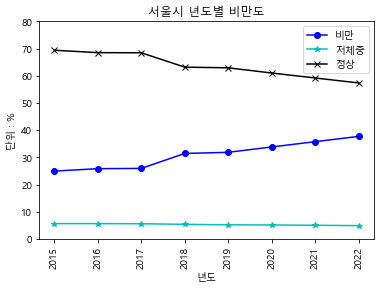

In [25]:
x = fat_Predict_merge.index
y1 = fat_Predict_merge['비만']
y2 = fat_Predict_merge['저체중']
y3 = fat_Predict_merge['정상']

plt.plot(x,y1, label = '비만', marker = "o", color = 'b')
plt.plot(x,y2, label = '저체중', marker = "*", color = 'c')
plt.plot(x,y3, label = '정상', marker = 'x', color = 'k')
plt.legend()
plt.xlabel('년도')
plt.ylabel('단위 : %')
plt.title('서울시 년도별 비만도')
plt.xticks(rotation = 90)
plt.ylim(0, 80)
plt.show()

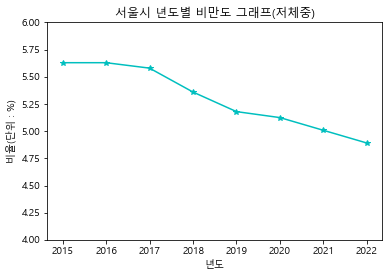

In [26]:
plt.plot(x,y2, label = '저체중', marker = "*", color = 'c')
plt.ylim(4,6)
plt.xlabel('년도')
plt.ylabel('비율(단위 : %)')
plt.title('서울시 년도별 비만도 그래프(저체중)')
plt.show()

In [27]:
Income_standard = []

In [28]:
for i in range(0,len(Predict_merge.index)):
    Income_standard.append(round(Predict_merge.iloc[i,:].mean(),3))                                 

In [29]:
fat_Predict_merge['소득기준'] = Income_standard

In [30]:
fat_Predict_merge

,비만,저체중,정상,소득기준
2015,24.950,5.630,69.420,4.221
2016,25.840,5.630,68.530,4.636
2017,25.940,5.580,68.480,5.053
2018,31.440,5.360,63.200,5.646
2019,31.860,5.180,62.950,6.255
2020,33.832,5.125,61.035,6.566
2021,35.774,5.008,59.208,7.113
2022,37.716,4.891,57.381,7.604


In [31]:
fat_Predict_merge.corr()

,비만,저체중,정상,소득기준
비만,1.000000,-0.988149,-0.999957,0.982602
저체중,-0.988149,1.000000,0.986687,-0.988802
정상,-0.999957,0.986687,1.000000,-0.981484
소득기준,0.982602,-0.988802,-0.981484,1.000000


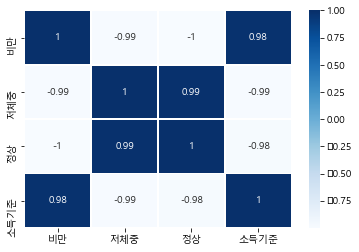

In [36]:
sns.heatmap(data = fat_Predict_merge.corr(), annot=True, linewidths=.5, cmap='Blues')

# 결론
### 소득기준과 비만은 양의 상관관계를 가지고 있고, 저체중과 정상 비율은 음의 상관관계를 가지고 있습니다. 즉 소득기준이 증가할수록 비만율도 증가하고, 저체중과 정상비율은 감소하는 관계를 나타내고 있습니다.